In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Iris dataset
FILE_PATH = '/content/drive/MyDrive/AIO 2024/Module_3/Week 2/T4/dataset/Iris.csv'

In [ ]:
# Đọc dữ liệu
df = pd.read_csv(FILE_PATH)
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Xem các thông tin và thống kê của bộ dữ liệu

In [ ]:
# Xem thông tin chung của bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Xem thống kê chung của bộ dữ liệu
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Xây dựng mô hình KNN

Phương thức bincout đếm số lượng xuất hiện của các phần tử trong mảng số nguyên
- Ý tưởng tìm giá trị lớn nhất trong mảng cần đếm
- Tạo ra mảng có max(arr) + 1 phần tử
- Giá trị của mảng tại chỉ số index i chính là số lượng xuất hiện phần tử i trong mảng cần đếm  

In [ ]:
class KNN:
  def __init__(self,K,weight = 'distance'):
    # Khởi tạo tham số K (Tham số quyết định số đối tượng gần nhất được lấy ra)
    self.K = K
    # Tham số để giải quyết vấn đề K là số chẵn
    self.weight = weight

  # Hàm Huấn luyện
  def fit(self,X_train,y_train):
    self.X_train = X_train # X_train
    self.y_train = y_train # y_train

  # Hàm dự đoán
  def predict(self,X_test):
    y_pred = []
    # Bắt lỗi ngoại lệ nếu X_test không phải là mảng hai chiều -> Error
    if X_test.ndim == 1:
      raise Exception('X must be 2D array')
      return
    self.X_test = X_test
    for x_test in self.X_test:
      # compute distance from x_test to all x in X_train - tính khoảng cách từ điểm x_test đến tất cả các điểm trong X_train
      distances = np.sqrt(((x_test.reshape(1,-1)-self.X_train)**2).sum(axis = 1))
      # select index of distance arr sort - Trả về mảng chỉ số theo distance được sắp xếp tăng dần
      idx_arr_distance_sort = np.argsort(distances)
      # Select K_Label of K object have distance min - Lấy ra  K nhãn của K đối tượng mà có khoảng cách min
      K_Label_nearest, K_distance_nearest = (self.y_train[idx_arr_distance_sort[:self.K]], distances[idx_arr_distance_sort[:self.K]])
      # predict for X_test - dự đoán nhãn cho dữ liệu tập test
      frequency_label = np.bincount(K_Label_nearest.astype(int))
      '''
      Muốn đơn giản đến đây có thể dùng y_pred.append(np.bincount(K_Label_nearest.astype(int)).argmax())
      return np.array(y_pred)
      '''



      # ------------------- Đoạn này cải thiện nếu K là số chẵn -> Có hơn 1 label chiếm đa sô -> dựa vào trọng số để phân loại cho đầu ra ----------------#
      # Lấy ra mảng các nhãn chiếm đa số trong K nhãn được lấy ra
      Labels_max_frequency = np.where(frequency_label == frequency_label.max())[0]
      if self.weight == 'distance':
        matrix_distance = np.array([
            Labels_max_frequency,
            [K_distance_nearest[K_Label_nearest==label].sum() for label in Labels_max_frequency]
        ])
        y_pred.append(matrix_distance[0,np.argmin(matrix_distance[1])].astype(int))
      if self.weight == 'uniform':
        y_pred.append(np.random.choice(Labels_max_frequency))
    return np.array(y_pred)

In [ ]:
# Sử dụng các thư viện cần thiết trong sklearn
# import phương thức mã hóa nhãn
from sklearn.preprocessing import LabelEncoder
# import phương thức đo độ chính xác của mô hình
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
## import phương thức chia dữ liêu
from sklearn.model_selection import train_test_split

# lấy ra tập dữ liệu train test

In [ ]:
X = df.iloc[:,:-1].to_numpy()
X[:5]

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [2. , 4.9, 3. , 1.4, 0.2],
       [3. , 4.7, 3.2, 1.3, 0.2],
       [4. , 4.6, 3.1, 1.5, 0.2],
       [5. , 5. , 3.6, 1.4, 0.2]])

In [ ]:
y = df.iloc[:,-1]
y.head(5)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
# Mã hóa nhãn
Le = LabelEncoder()
y = Le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Huấn luyện mô hình

In [ ]:
K = 3 # khởi tạo tham số K

In [ ]:
# Khởi tạo mô hình
clf = KNN(K,weight='distance')

In [ ]:
# Huấn luyện mô hình
clf.fit(X_train,y_train)

In [ ]:
# Dự đoán mô hình
y_pred = clf.predict(X_test)
print(y_pred)
print(y_test)

[0 2 0 1 2 2 2 0 2 0 1 0 0 0 1 2 2 1 0 1 0 1 2 1 0 2 1 1 0 0]
[0 2 0 1 2 2 2 0 2 0 1 0 0 0 1 2 2 1 0 1 0 1 2 1 0 2 1 1 0 0]


In [ ]:
# Đánh giá mô hình
# Độ đo accuraccy
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  1.0


In [ ]:
# Độ đo precision
print(f"Precision: {precision_score(y_pred,y_test,average='macro')}")

Precision: 1.0


In [ ]:
# Sử dụng phương thức classification_report để trả về báo cáo về các độ đo chính sác
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Sử dụng Mô hình KNN trong thư viện Sklearn

In [200]:
# sử dụng mô hình KNN trong sklearn
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3,weights='distance')

In [ ]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  1.0


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Tìm tham số K tốt nhất cho mô hình

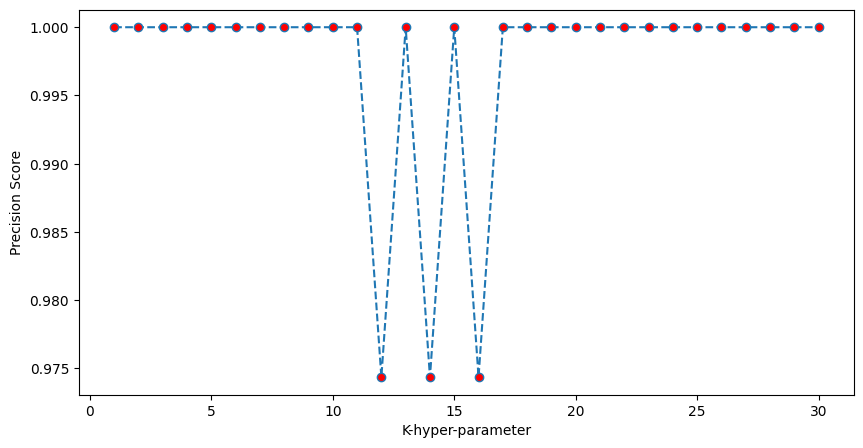

In [ ]:
Score = []
for K in range(1,31):
  clf = KNN(K)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  # Đánh giá dựa vào độ đo chính sác precision Tỷ lệ thực sự là đúng trong tổng số dự đoán
  Score.append(precision_score(y_test,y_pred,average='macro'))

# Vẽ biểu đồ để chọn K có độ đo precision là lớn nhất
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,31),Score,marker ='o',markerfacecolor = 'red',ls = '--')
plt.xlabel('K-hyper-parameter')
plt.ylabel('Precision Score')
plt.show()

In [ ]:
# Chọn K = 12 để kiểm tra
clf = KNN(12)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(f"precision_score: {precision_score(y_pred,y_test,average='macro')}")

precision_score: 0.9629629629629629


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
a = np.array([1,2,3,1])
np.where(a==1)[0]

array([0, 3])